# BIFROST inelastic energy resolution

##### Packages

In [1]:

from KGS import *


## Importion and data scraping function

In [4]:
#filename = "./HL_Ei_15/0/tof_det_5p0_mid_res.dat"


def read_data(Etrans, PSC ,detector):
    filename = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'/'+str(PSC)+'/tof_det_'+detector+'_mid_res.dat'
    
    t_bins = np.genfromtxt(filename)
    
    filename2 = '../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'/'+str(PSC)+'/ToFAfterPSC2.dat'  
    
    with open(filename2, 'r') as the_file:
        all_data2 = [line.strip() for line in the_file.readlines()]
        height_line2 = all_data2[3]
        data2 = all_data2[8:]
        t_data2 = all_data2[37]
        t_data2 = t_data2.replace('# statistics: X0=', '')
        t_data2 = t_data2.replace('dX=', '')
        t_data2 = t_data2.replace(';', '')
        t_data2 = t_data2.split(' ')
        t_data2 = np.asarray(t_data2[0], dtype=float)
        t_offset = np.array([t_data2])
    
    
    with open(filename, 'r') as the_file:
        all_data = [line.strip() for line in the_file.readlines()]
        height_line = all_data[3]
        data = all_data[8:]
        t_data = all_data[37]
        t_data = t_data.replace('# statistics: X0=', '')
        t_data = t_data.replace('dX=', '')
        t_data = t_data.replace(';', '')
        t_data = t_data.split(' ')
        t_data = np.asarray(t_data, dtype=float)
        
        
        PSC_t = all_data[13]
        PSC_t = PSC_t.replace('# Param: chopPulseOpening=','')
        PSC_t = np.asarray(PSC_t, dtype=float)
        
        detector = detector.replace('p', '.')
        detector = np.asarray(detector, dtype=float)
        
        meta_data = np.array([detector, Etrans, PSC_t])
        
        meta_data = np.concatenate((meta_data, t_data, t_offset))
        
        return meta_data, t_bins
        
# Resulting data format: Detector, DeltaE, PSC opening time, time peak center, time peak width, t_offset 
        
read_data(0, 0, '2p7')[1]


array([[5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.50000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.50000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       ...,
       [2.49975e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.49985e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.49995e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00]])

## Importing all sections of phase space

In [5]:
def import_phase_section(N_points):
    meta_data = []
    time_data = []

    Delta_E = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
    detectors = np.array(['2p7', '3p2', '3p8', '4p4', '5p0'])

    for i in range(N_points):
        for j in detectors:
            for n in Delta_E:
                r_data = read_data(n, i, j)
                meta_data.append(r_data[0])
                time_data.append(r_data[1])
                
    fin_meta_data = np.asarray(meta_data)
    fin_time_data = time_data
    return fin_meta_data, fin_time_data

phase = import_phase_section(15)

phase_space = phase[0]
time_phase_space = phase[1]



In [6]:
print(np.shape(phase_space))

(1425, 6)


In [7]:
print(np.shape(phase_space))
print(time_phase_space[0])
print(phase_space[2])

(1425, 6)
[[5.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.50000e+01 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.50000e+01 0.00000e+00 0.00000e+00 0.00000e+00]
 ...
 [2.49975e+05 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.49985e+05 0.00000e+00 0.00000e+00 0.00000e+00]
 [2.49995e+05 0.00000e+00 0.00000e+00 0.00000e+00]]
[2.70000e+00 2.00000e+00 1.00000e-04 1.75149e+05 1.19643e+02 7.83125e+03]


### Attaching length information to metadata

In [8]:
back_info = pd.read_csv('BIFROST_McStas_backend_information.csv')
back_info = back_info.loc[back_info['wedge_number'] == 1]

back_info = np.asarray(back_info)[:,0:5]

for j in range(len(back_info)):
    back_info[j,3] = back_info[j,3].replace(',','.')
    back_info[j,4] = back_info[j,3].replace(',','.')

back_info = np.asarray(back_info, dtype=float)    
    
back_info = back_info[(back_info[:,0]== 2.7)  & (back_info[:,2]== 4) | (back_info[:,0]== 3.2) & (back_info[:,2]== 4)| (back_info[:,0]== 3.8) & (back_info[:,2]== 5) | (back_info[:,0]== 4.4) & (back_info[:,2]== 5) | (back_info[:,0]== 5.0) & (back_info[:,2]== 5)]

phase_space_meta = []

for i in range(len(phase_space)):
    if phase_space[i,0]==2.7:
        test1 = np.concatenate((phase_space[i],back_info[0,3:5]))
        phase_space_meta.append(test1)
    if phase_space[i,0]==3.2:
        test2 =np.concatenate((phase_space[i],back_info[1,3:5]))
        phase_space_meta.append(test2)
    if phase_space[i,0]==3.8:
        test3 =np.concatenate((phase_space[i],back_info[2,3:5]))
        phase_space_meta.append(test3)
    if phase_space[i,0]==4.4:
        test4 =np.concatenate((phase_space[i],back_info[3,3:5]))
        phase_space_meta.append(test4)
    if phase_space[i,0]==5.0:
        test5 =np.concatenate((phase_space[i],back_info[4,3:5]))
        phase_space_meta.append(test5)
        
phase_space = np.asarray(phase_space_meta)      



In [9]:
print(phase_space[0])

[2.70000e+00 0.00000e+00 1.00000e-04 2.29141e+05 2.60678e+02 9.40566e+03
 1.10000e+00 1.10000e+00]


### Finding all the different PSC times in simulation

In [10]:
## Finding all the different PSC times

times = phase_space[phase_space[:,0]==5]
PSC_times = times[times[:,1]==1][:,2]

print('PSC_times [ms] =', PSC_times*1000)


PSC_times [ms] = [0.1      0.164286 0.228571 0.292857 0.357143 0.421429 0.485714 0.55
 0.614286 0.678571 0.742857 0.807143 0.871429 0.935714 1.      ]


### Plotting the phase space (in time)

/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_37349/3512220099.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


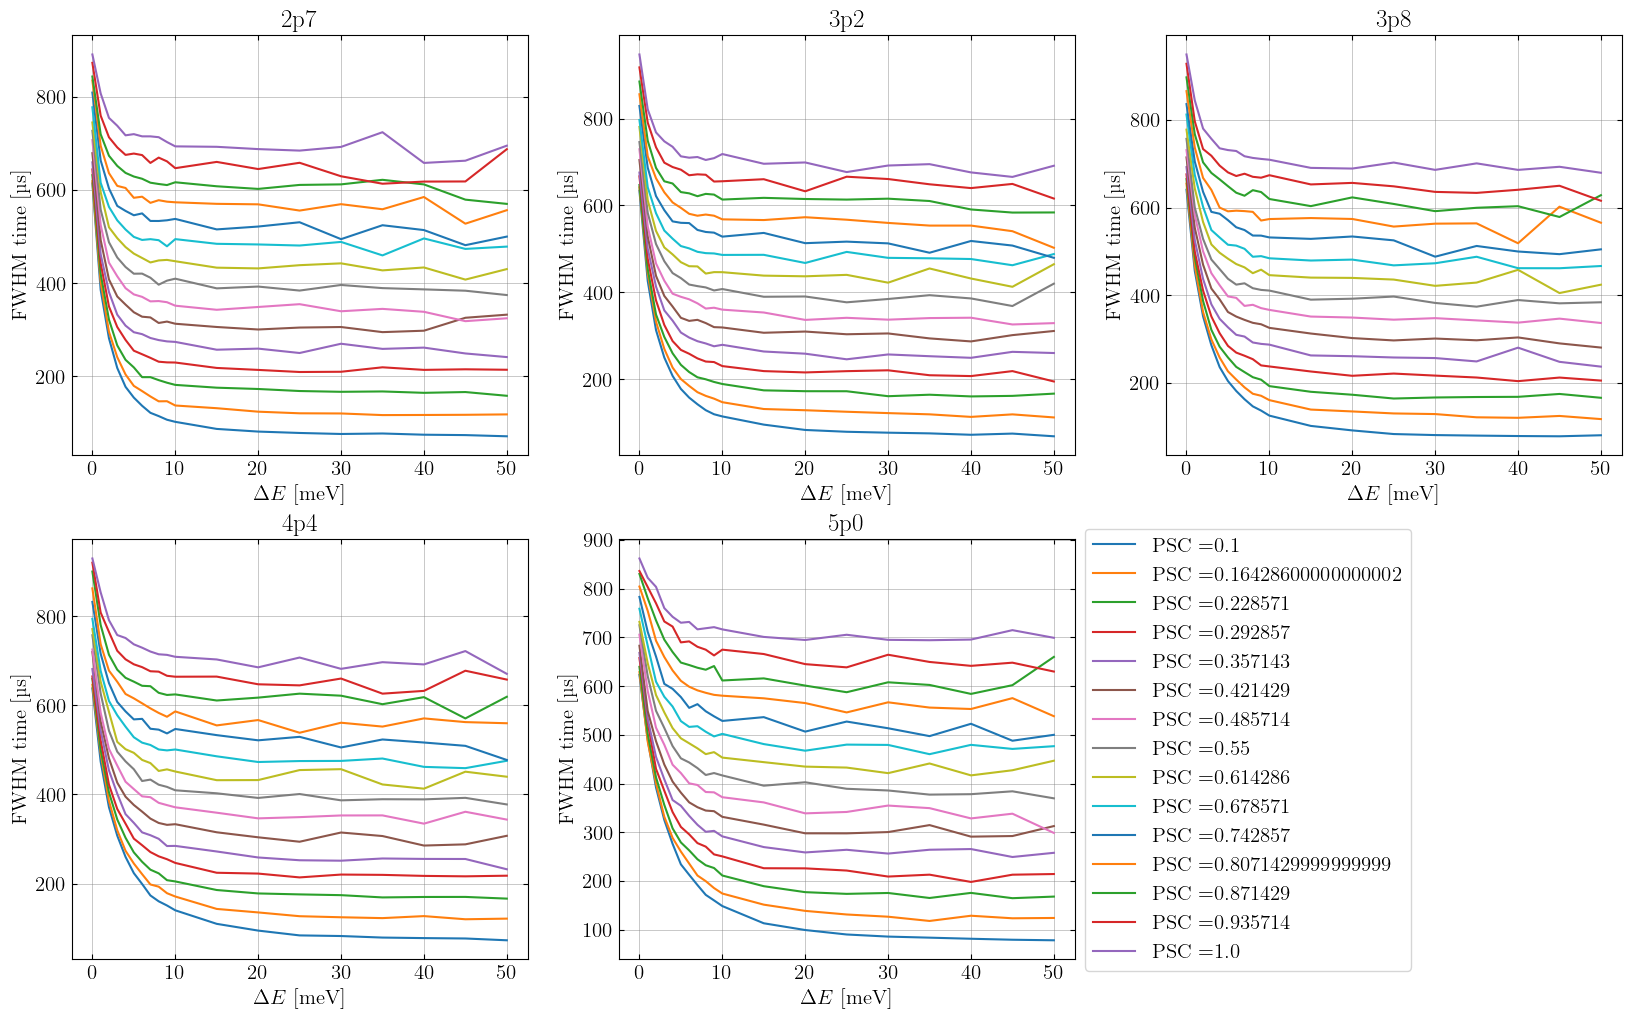

In [11]:
detectors = np.array(['2p7', '3p2', '3p8', '4p4', '5p0'])

detector_float = np.array([2.7, 3.2, 3.8, 4.4, 5.0])

DeltaE = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])

Time_FWHM= []

n = 5
max_width = 3 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(20,12))

for i in range(len(detector_float)):
    sub_space = phase_space[phase_space[:,0]==detector_float[i]]
    for n in range(len(PSC_times)):
        sub_space_2= sub_space[sub_space[:,2]==PSC_times[n]]
        ax = axs.flat[i]
        Time_FWHM.append(sub_space_2[:,4])#*2.355
        ax.plot(sub_space_2[:,1], sub_space_2[:,4]*2.355, '-', label='PSC ='+str(PSC_times[n]*1000))
        ax.set_xlabel('$\Delta E$ [meV]')
        ax.set_ylabel('FWHM time [µs]')
        ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
        ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
    ax.set_title(detectors[i])
ax.legend( bbox_to_anchor=(1.0, 0.55, 0.5, 0.5))


## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
    
fig.show()

Time_FWHM = np.reshape(Time_FWHM, (5,-1,19))

#print(Time_FWHM[2][7]/2.355)

/var/folders/f1/pbcb3xr90wn7_tx3k9d6kcyr0000gn/T/ipykernel_37349/4223973413.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


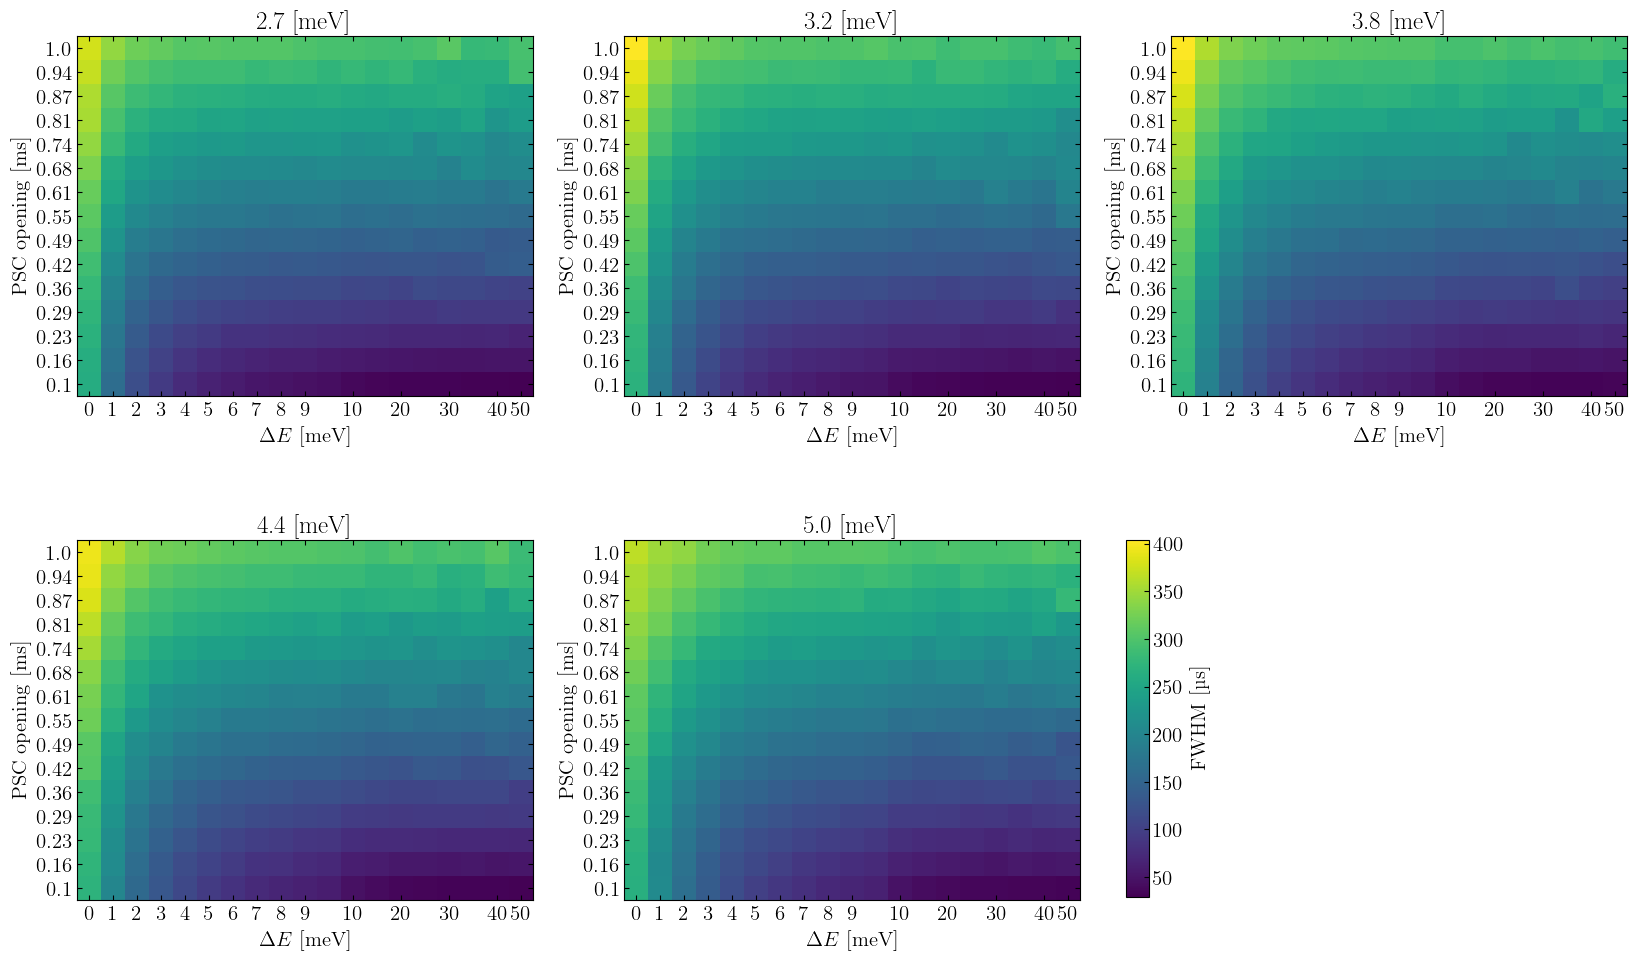

In [12]:
n = 5
max_width = 3 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(20,12))

DeltaE_label = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50])

max_time = np.max(Time_FWHM)
min_time = np.min(Time_FWHM)

for i in range(len(detector_float)):
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(Time_FWHM[i]), vmin=min_time, vmax=max_time)
    ax.set_xlabel('$\Delta E$ [meV]')
    ax.set_ylabel('PSC opening [ms]')
    #ax.legend(loc="upper right")
    ax.set_title(str(detector_float[i])+' [meV]')
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 18])#
    ax.set_xticklabels(DeltaE_label)
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    ax.set_yticklabels(np.flip(np.around(PSC_times*1000, 2),axis=0))
cax = ax.inset_axes([1.1, 0.01, 0.05, 0.99])
fig.colorbar(im, label='FWHM [µs]', ax=axs[1, 2], cax=cax)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

fig.show()
#fig.savefig('Inelastic_time_resolution.png')

## Conversion from time to energy transfere $\Delta E$

meta_data = [2.70000e+00 1.00000e+00 1.00000e-04 1.96650e+05 1.63652e+02 8.47681e+03
 1.10000e+00 1.10000e+00]
FWHM = 0.015387439238928264


Text(0, 0.5, 'I [a.u.]')

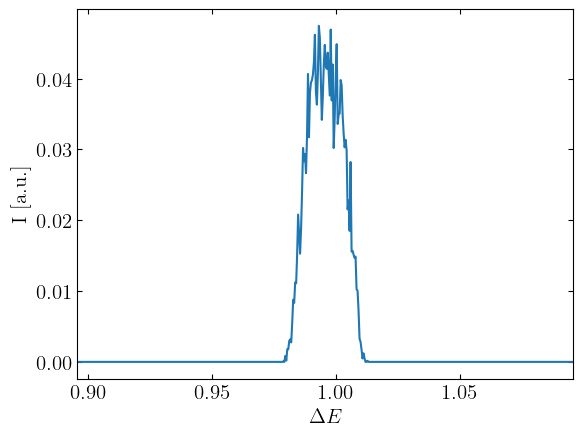

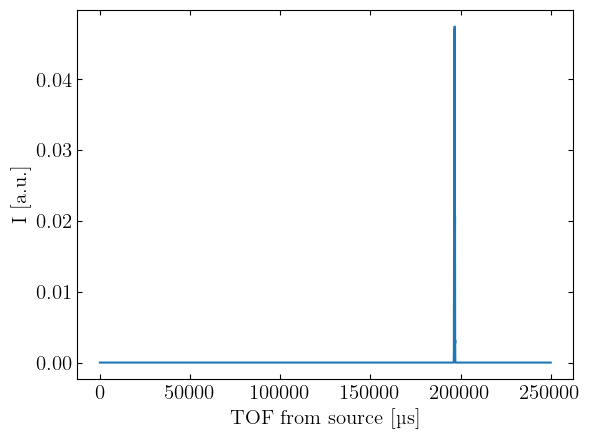

In [13]:
def t_to_DeltaE(meta_data, time_data):
    
    detector = meta_data[0]*1.602176634e-22 # [J]
    t_offset = meta_data[5]*1e-6
    
    time = time_data[time_data[:,0]>=40*1e3]
    
    t = time[:,0]*1e-6 # [s]
    m_n = 1.67492749804e-27 # [kg]
    L1 = (162-6.35) # [m]
    L2 = meta_data[6]+meta_data[7] # [m]
    
    Ei = (L1**2*m_n)/(2*(t-np.sqrt((m_n*L2**2)/(2*detector))-t_offset)**2)
    Delta_E = (Ei-detector)*6.24150907e21 # convert from J to meV
    
    mu = np.average(Delta_E, weights=time[:,1])
    FWHM = np.sqrt(np.average((Delta_E-mu)**2, weights=time[:,1]))*2.3548
    
    #print('µ = ', mu)
    #print('var = ', FWHM)
    
    return np.column_stack((Delta_E, time[:,1::])), mu, FWHM


test_set_index = 1

test, test_mu, test_FWHM = t_to_DeltaE(phase_space[test_set_index], time_phase_space[test_set_index]) 

print('meta_data =', phase_space[1])
print('FWHM =', test_FWHM)

plt.figure()
plt.plot(test[:,0], test[:,1], '-')
plt.xlim(test_mu-0.1,test_mu+0.1)
plt.xlabel('$\Delta E$')
plt.ylabel('I [a.u.]')


plt.figure()
plt.plot(time_phase_space[test_set_index][:,0], time_phase_space[test_set_index][:,1])
plt.xlabel('TOF from source [µs]')
plt.ylabel('I [a.u.]')

### Converting all phase space into energy

In [14]:
# Jeg skal fra time_phase_space and phase_space 

print(type(time_phase_space))

time_phase_space = np.array(time_phase_space)

mu_E =[]
FWHM_E = []

for i in range(len(detector_float)):
    time_sub_space = time_phase_space[phase_space[:,0]==detector_float[i]]
    sub_space = phase_space[phase_space[:,0]==detector_float[i]]
    for n in range(len(PSC_times)):
        time_sub_space_2 = time_sub_space[sub_space[:,2]==PSC_times[n]]
        sub_space_2 = sub_space[sub_space[:,2]==PSC_times[n]]
        for j in range(len(sub_space_2)):
            E_sub_space, E_mu, E_FWHM = t_to_DeltaE(sub_space_2[j], time_sub_space_2[j])
            mu_E.append(E_mu)
            FWHM_E.append(E_FWHM)
   
mu_E = np.asarray(mu_E)
FWHM_E = np.asarray(FWHM_E)


<class 'list'>


### Writing the information to a txt file

In [15]:
print(np.shape(FWHM_E))
print(np.shape(phase_space))
  # 2D list with shape (1425, 8)

# Zipping the lists together
zipped_list = [(*a, b) for a, b in zip(phase_space, FWHM_E)]

#np.savetxt('list_output_line_resolution.txt', zipped_list, fmt='%.5f', delimiter=' ', header='#Detector, DeltaE, PSC opening time, time peak center, time peak width, t_offset, FWHM_E', comments='')

# Appending to a text file
with open('list_output_line_resolution3.txt', 'a') as file:
    for row in zipped_list:
        # Convert each tuple to a space-separated string and write it
        file.write(" ".join(map(str, row)) + "\n")

(1425,)
(1425, 8)


In [ ]:

matrix = np.zeros((5, 15, 19))
# Define the sequence of numbers
labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
Ei_matrix = np.zeros((5, 15, 19))
# Fill the 19 columns in the 3 layers with the sequence

for i in range(5):
    for j in range(19):
        matrix[i, :, j] = labels[j]
        Ei_matrix[i, :, j] = labels[j]

for i in range(5):
    if i == 0:
        Ei_matrix[i] += 2.7
    if i == 1:
        Ei_matrix[i] += 3.2
    if i == 2:
        Ei_matrix[i] += 3.8
    if i == 3:
        Ei_matrix[i] += 4.4
    if i == 4:
        Ei_matrix[i] += 5.0



In [ ]:
import matplotlib.colors as colors

mu_E = np.reshape(mu_E, (5,-1,19))

div_E=(mu_E-matrix)#/Ei_matrix*100

print(div_E[0,:,0])

n = 5
max_width = 5 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(30,12), sharey=True)
fig.subplots_adjust(wspace=0)
max_E = np.max(div_E)
min_E = np.min(div_E)



for i in range(len(detector_float)):
    #ax.set_ylabel('PSC opening [ms]')
    #ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    #ax.set_yticklabels(np.flip(np.around(PSC_times*1000, 2),axis=0))
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(div_E[i]), vmin=min_E, vmax=max_E, cmap='jet') # norm=colors.LogNorm(vmin=min_E, vmax=max_E)
    ax.set_xlabel('$\Delta E$ [meV]', fontsize=18)
    #ax.legend(loc="upper right")
    ax.set_title(str(detector_float[i])+' meV analyzer')
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18])
    ax.set_xticklabels(DeltaE_label)
cax = ax.inset_axes([1.02, 0.01, 0.05, 0.99])
fig.colorbar(im, label='$(\mu_{E} - \Delta E)/Ei$ [%]', ax=axs[1, 2], cax=cax) # '$\mu_{E} - \Delta E$ [meV]'
fig.text(0.1, 0.7, 'PSC opening [ms]', va='center', rotation='vertical', fontsize=16)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

#fig.savefig('Inelastic_Energy_centering_on_detectors_per_Ei.eps', format='eps', bbox_inches='tight')
#fig.savefig('Inelastic_Energy_centering_on_detectors_per_Ei.png', format='png', bbox_inches='tight')

### Plotting the $\Delta E$ phase space of BIFROST

In [ ]:
#import matplotlib.colors as colors
#print(FWHM_E)
FWHM_E = np.reshape(FWHM_E, (5,-1,19))
#FWHM_E=(FWHM_E)/matrix


mpl.rcParams['font.size']        = 26 # standard er 45
n = 5
max_width = 5 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(31,12), sharey=True)
fig.subplots_adjust(wspace=0.03)
max_E = np.max(FWHM_E)
min_E = np.min(FWHM_E)

PSC_labels = np.array([0.0001, 0.00022857, 0.00035714, 0.00048571, 0.00061429, 0.00074286, 0.00087143, 0.001])
Delta_E_labels = np.array([0, 2, 4, 6, 8, 10, 20, 30, 40, 50])


for i in range(len(detector_float)):
    #ax.set_ylabel('PSC opening [ms]')
    ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
    ax.set_yticklabels(np.flip(np.around(PSC_labels*1000, 2),axis=0), fontsize=22)
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(FWHM_E[i]), norm=colors.LogNorm(vmin=min_E, vmax=max_E), cmap='jet') # norm=colors.LogNorm(vmin=min_E, vmax=max_E)
    ax.set_xlabel('$\Delta E$ [meV]', fontsize=26)
    #ax.legend(loc="upper right")
    ax.set_title('$E_f$ ='+str(detector_float[i])+' meV', fontsize = 26)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    ax.set_xticklabels(Delta_E_labels, fontsize=22)
cax = ax.inset_axes([1.02, 0.01, 0.05, 0.99])
cbar=fig.colorbar(im, label='FWHM [meV]', ax=axs[1, 2], cax=cax)
cbar.ax.tick_params(labelsize=22)
fig.text(0.089, 0.7, 'PSC opening [ms]', va='center', rotation='vertical', fontsize=26)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

#fig.savefig('Inelastic_Energy_resolution_Article_log.eps', format='eps', bbox_inches='tight')
fig.savefig('Inelastic_Energy_resolution_Article_log.png', format='png', bbox_inches='tight')
mpl.rcParams['font.size']        = 14 # standard er 45


# Analytic claculation of the resolution

## Calculating the approximate method resolution

In [ ]:
# Determine sigma Ef
detectors = np.array(['2p7', '3p2', '3p8', '4p4', '5p0'])

def read_Emon(detector):
    """
    This function loads the Emon data that is found on the detector and it 
    creates a set of meta data that tells you what Delta E, Ef and PSC setting the data is from.
    """
    filename = './Ef_res_sim1/emon_det_'+detector+'_mid_res.dat'
    
    E_bins = np.genfromtxt(filename)
    
    mu = np.average(E_bins[:,0], weights=E_bins[:,1])
    sigma = np.sqrt(np.average((E_bins[:,0]-mu)**2, weights=E_bins[:,1]))
        
    detector = detector.replace('p', '.')
    detector = np.asarray(detector, dtype=float)
        
    meta_data = np.array([detector, mu, sigma])
        
    return meta_data

Ef_mon_sigma = []

for k in range(len(detectors)):
    data = read_Emon(detectors[k])
    Ef_mon_sigma.append(data[2])

Ef_mon_sigma = np.asarray(Ef_mon_sigma)
print(Ef_mon_sigma)

In [ ]:
# Determine sigma Ei

def read_PSC_t(Etrans, PSC):
    filename = './Cluster_v11/'+'v11_Ei_'+str(Etrans)+'/'+str(PSC)+'/ToFAfterPSC2.dat'
    
    t_bins = np.genfromtxt(filename)
    
    mu = np.average(t_bins[:,0], weights=t_bins[:,1])
    sigma = np.sqrt(np.average((t_bins[:,0]-mu)**2, weights=t_bins[:,1]))
        
    meta_data = np.array([Etrans, PSC, mu, sigma])
    
    return meta_data


def sigma_Ei(DeltaE, Ef, PSC):
    
    read = read_PSC_t(DeltaE,PSC)
    

    Ei = (DeltaE + Ef)#*1.602176634e-22 # [J]
    sigma_PSCt = read[3]*1e-6 # [s]
    m_n = 1.67492749804e-27 # [kg]
    L1 = (162-6.35) # [m]
    
    sigma_Ei = (874.8*np.power(Ei,3/2)*sigma_PSCt)/(L1)#*6.24150907e21 # convert from J to meV # convert from J to meV
    
    return sigma_Ei


print(sigma_Ei(0,2.7,0))

In [ ]:
#Calculating sigma Delta E

def sigma_DeltaE(sigma_Ei, sigma_Ef):
    return np.sqrt(sigma_Ei**2+sigma_Ef**2)*2.35

#print(sigma_DeltaE(sigma_Ei(10,5,14), Ef_mon_sigma[4]))

DeltaE = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])

res_5_1p0 = []
res_5_0p1 = []
res_2p7_1p0 = []
res_2p7_0p1 = []


for h in range(0,19):
    sigma_5_1p0 = sigma_DeltaE(sigma_Ei(DeltaE[h],5,14), Ef_mon_sigma[4])
    res_5_1p0.append(sigma_5_1p0)
    
    sigma_5_0p1 = sigma_DeltaE(sigma_Ei(DeltaE[h],5,0), Ef_mon_sigma[4])
    res_5_0p1.append(sigma_5_0p1)
    
    sigma_2p7_1p0 = sigma_DeltaE(sigma_Ei(DeltaE[h],2.7,14), Ef_mon_sigma[0])
    res_2p7_1p0.append(sigma_2p7_1p0)
    
    sigma_2p7_0p1 = sigma_DeltaE(sigma_Ei(DeltaE[h],2.7,0), Ef_mon_sigma[0])
    res_2p7_0p1.append(sigma_2p7_0p1)
    
sigma_5_1p0 = np.asarray(res_5_1p0)
sigma_5_0p1 = np.asarray(res_5_0p1)
sigma_2p7_1p0 = np.asarray(res_2p7_1p0)
sigma_2p7_0p1 = np.asarray(res_2p7_0p1)

print(sigma_2p7_0p1)

## Error propagation method


In [ ]:

def theo_tof(meta_data):
    # Defining all relevant parameters
    m_n = 1.67492749804e-27 # [kg] 
    E_f = meta_data[0] *1.602176634e-22
    Delta_E = meta_data[1]*1.602176634e-22 # [J]
    E_i = Delta_E+E_f # [meV]
    Li = (162-6.35) # [m]
    Lf = meta_data[6]+meta_data[7] # [m]
    #print(meta_data[1])

    # Calculating the theoritical time 
    theo_tof = np.sqrt((m_n*Li**2)/(2*E_i))+np.sqrt((m_n*Lf**2)/(2*E_f)) # [s]
    #print('theo_tof =',theo_tof)
    
    return theo_tof



def Error_prop(meta_data, sigma_Ef, PSC):
    
    # Ordering the data and defining parameters
    E_f = meta_data[0]*1.602176634e-22 # [J]
    Etrans = int(meta_data[1])
    m_n = 1.67492749804e-27 # [kg]
    Li = (162-6.35) # [m]
    Lf = meta_data[6]+meta_data[7] # [m]
    sigma_tof = meta_data[2]#*2.35 # [s]
    Delta_E = meta_data[1]
    #print(sigma_tof)

    # Calculating the theoretical t_ToF
    t_tof = theo_tof(meta_data)


    # Calculating the t_f
    t_f = np.sqrt((Lf**2*m_n)/(2*E_f))
    #print('t_f =', t_f)

    
    # Calculating the DE_tof 
    DE_tof = ((-Li**2*m_n)/(t_tof-t_f)**3)*6.24150907e21
    #print('DE_tof =',DE_tof)

    # Calculating the DE_Ef 
    DE_Ef = (-1-(Li**2*m_n*t_f)/(2*E_f*(t_tof-t_f)**3))#*6.24150907e21
    #print('DE_Ef =',DE_Ef)

    # Full theory expression
    Error_deltaE = np.sqrt((DE_tof*read_PSC_t(Etrans, PSC)[3]*1e-6)**2+(DE_Ef*sigma_Ef)**2)*2.35

    return Error_deltaE



In [ ]:
phase_space_meta=np.asarray(phase_space_meta)


def find_phase_space_meta(ms, analyzer):
    """
    returns an array of the right indexes in the meta data given the analyzer and PSC setting.
    """
    indices = np.where((phase_space_meta[:,0] == analyzer) & (phase_space_meta[:,2] == ms*1e-3))
    return indices[0]


print(find_phase_space_meta(1, 5.0))

In [ ]:
# Calculating FWHM for the setting I need

idx_2p7_0p1 = find_phase_space_meta(0.1, 2.7)
ErrorProb_2p7_0p1ms = []

for i in idx_2p7_0p1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[0],0)
    #print('FWHM DeltaE =',res)
    ErrorProb_2p7_0p1ms.append(res)



idx_2p7_1 = find_phase_space_meta(1, 2.7)
ErrorProb_2p7_1ms = []

for i in idx_2p7_1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[0],14)
    #print('FWHM DeltaE =',res)
    ErrorProb_2p7_1ms.append(res)



idx_5p0_0p1 = find_phase_space_meta(0.1, 5.0)
ErrorProb_5p0_0p1ms = []

for i in idx_5p0_0p1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[4],0)
    #print('FWHM DeltaE =',res)
    ErrorProb_5p0_0p1ms.append(res)



idx_5p0_1 = find_phase_space_meta(1, 5.0)
ErrorProb_5p0_1ms = []

for i in idx_5p0_1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[4],14)
    #print('FWHM DeltaE =',res)
    ErrorProb_5p0_1ms.append(res)


## Plotting cuts in the $\Delta E$ phase space of BIFROST - Article

In [ ]:
# The right sigma Ei anf sigma Ef curves. 

Delta_E_range = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
Delta_E_range_T = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])

sigma_Ei_5_0p1 = []

for i in Delta_E_range:
    num = sigma_Ei(i,5.0,0)
    sigma_Ei_5_0p1.append(num)

sigma_Ef_5 = np.ones(len(Delta_E_range))*Ef_mon_sigma[4]

In [ ]:

mpl.rcParams['font.size'] = 20
print(np.shape(FWHM_E))
from matplotlib.ticker import ScalarFormatter



fig, ax = plt.subplots(figsize=(9,6))
ax.plot(Delta_E_range, FWHM_E[0,0,:], '.',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='#7f7ff0')
ax.plot(Delta_E_range, sigma_2p7_0p1, color='#7f7ff0')

ax.plot(Delta_E_range, FWHM_E[4,0,:], '.', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='b')
ax.fill_between(Delta_E_range, FWHM_E[0,0,:], FWHM_E[4,0,:], color='b', alpha=0.1)
ax.plot(Delta_E_range, sigma_5_0p1, color='b')

ax.plot(Delta_E_range, FWHM_E[0,14,:], '.', label='$E_f =$2.7 meV, PSC = 1 ms', color='#e36256')
ax.plot(Delta_E_range, sigma_2p7_1p0, color='#e36256')

ax.plot(Delta_E_range, FWHM_E[4,14,:], '.', label='$E_f =$5.0 meV, PSC = 1 ms', color='r')
ax.fill_between(Delta_E_range, FWHM_E[0,14,:], FWHM_E[4,14,:], color='r', alpha=0.1)
ax.plot(Delta_E_range, sigma_5_1p0, color='r')

print(FWHM_E[4,14,:])

newax = fig.add_axes([0.21,0.56,0.3,0.26], anchor='NW', zorder=1)
newax.plot(Delta_E_range, sigma_5_0p1/2.35, '-', label='Total', color='k')
newax.plot(Delta_E_range, sigma_Ei_5_0p1, '.-', label='$\sigma_{E_i}$', color='green')
newax.plot(Delta_E_range, sigma_Ef_5, '.-', label='$\sigma_{E_f}$',color='m')
newax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
newax.tick_params(labelsize=9)
newax.set_yscale('log')
newax.set_xscale('log')
newax.set_ylim(1e-3,1e-1)

newax.set_title('$E_f$ = 5 meV, PSC = 0.1 ms', fontsize=14)
newax.set_ylabel('$\sigma(\hbar \omega)$ [meV]', fontsize=14)
newax.set_xlabel('$\Delta E$ [meV]', fontsize=14)
newax.legend(fontsize=10.5)
newax.yaxis.set_major_formatter(ScalarFormatter())
newax.xaxis.set_major_formatter(ScalarFormatter())
newax.grid()

ax.set_xlabel('$\Delta E$ [meV]', fontsize=22)
ax.set_ylabel('FWHM [meV]', fontsize = 22)
ax.set_ylim(1e-2,2)
#ax.set_xlim(0,50)
ax.set_yscale('log')
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.legend(fontsize=10.5, bbox_to_anchor=(0.63, 0.03, 0.2, 0.2))
fig.savefig('Energy_resolution_cuts_Article_different_analyzers_loglog.png', format='png', bbox_inches='tight')
#fig.savefig('Energy_resolution_cuts_Article_different_analyzers_loglog.eps', format='eps', bbox_inches='tight')

## Plotting cuts in the $\Delta E$ phase space of BIFROST - Thesis

In [ ]:
# Set the font family to match Overleaf math environment
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Import necessary packages
plt.rcParams['font.family'] = 'lmodern'  # Choose the font (e.g., Latin Modern)



print(np.shape(FWHM_E))
from matplotlib.ticker import ScalarFormatter

Delta_E_range = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
Delta_E_range_T = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,6), sharey='row', sharex=True,  gridspec_kw={'height_ratios': [1, 0.4]})
fig.subplots_adjust(wspace=0.03)

ax[0,0].plot(Delta_E_range, FWHM_E[0,0,:], '.',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='#b12a90')
ax[0,0].plot(Delta_E_range, sigma_2p7_0p1, color='#b12a90')

ax[0,0].plot(Delta_E_range, FWHM_E[4,0,:], '.', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='#6a00a8')
ax[0,0].fill_between(Delta_E_range, FWHM_E[0,0,:], FWHM_E[4,0,:], color='#6a00a8', alpha=0.1)
ax[0,0].plot(Delta_E_range, sigma_5_0p1, color='#6a00a8')

ax[0,0].plot(Delta_E_range, FWHM_E[0,14,:], '.', label='$E_f =$2.7 meV, PSC = 1 ms', color='#35b779')
ax[0,0].plot(Delta_E_range, sigma_2p7_1p0, color='#35b779')

ax[0,0].plot(Delta_E_range, FWHM_E[4,14,:], '.', label='$E_f =$5.0 meV, PSC = 1 ms', color='#31688e')
ax[0,0].fill_between(Delta_E_range, FWHM_E[0,14,:], FWHM_E[4,14,:], color='#31688e', alpha=0.1)
ax[0,0].plot(Delta_E_range, sigma_5_1p0, color='#31688e')


ax[0,0].set_ylabel('FWHM [meV]', fontsize = 18)
ax[0,0].set_ylim(1e-2,1.7)
#ax.set_xlim(0,50)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].yaxis.set_major_formatter(ScalarFormatter())
ax[0,0].grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax[0,0].grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax[0,0].legend(fontsize=10)
ax[0,0].set_title('Approximate method')


ax[0,1].plot(Delta_E_range, FWHM_E[0,0,:], '.',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='#b12a90')
ax[0,1].plot(Delta_E_range, ErrorProb_2p7_0p1ms, color='#b12a90')

ax[0,1].plot(Delta_E_range, FWHM_E[4,0,:], '.', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='#6a00a8')
ax[0,1].fill_between(Delta_E_range, FWHM_E[0,0,:], FWHM_E[4,0,:], color='#6a00a8', alpha=0.1)
ax[0,1].plot(Delta_E_range, ErrorProb_5p0_0p1ms, color='#6a00a8')

ax[0,1].plot(Delta_E_range, FWHM_E[0,14,:], '.', label='$E_f =$2.7 meV, PSC = 1 ms', color='#35b779')
ax[0,1].plot(Delta_E_range, ErrorProb_2p7_1ms, color='#35b779')

ax[0,1].plot(Delta_E_range, FWHM_E[4,14,:], '.', label='$E_f =$5.0 meV, PSC = 1 ms', color='#31688e')
ax[0,1].fill_between(Delta_E_range, FWHM_E[0,14,:], FWHM_E[4,14,:], color='#31688e', alpha=0.1)
ax[0,1].plot(Delta_E_range, ErrorProb_5p0_1ms, color='#31688e')

ax[0,1].set_ylim(1e-2,1.7)
#ax.set_xlim(0,50)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].xaxis.set_major_formatter(ScalarFormatter())
ax[0,1].yaxis.set_major_formatter(ScalarFormatter())
ax[0,1].grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax[0,1].grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
#ax[0,1].legend(fontsize=10)
ax[0,1].set_title('Error propagation')

# How much goes each method diverge from the simulation results.

DivApprox_2p7_0p1ms = (FWHM_E[0,0,:]- sigma_2p7_0p1)/sigma_2p7_0p1*100
DivApprox_2p7_1ms = (FWHM_E[0,14,:] - sigma_2p7_1p0)/sigma_2p7_1p0*100

DivApprox_5p0_0p1ms = (FWHM_E[4,0,:] - sigma_5_0p1)/sigma_5_0p1*100
DivApprox_5p0_1ms = (FWHM_E[4,14,:] - sigma_5_1p0)/sigma_5_1p0*100


ax[1,0].plot(Delta_E_range, DivApprox_2p7_0p1ms, '--',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='#b12a90')
ax[1,0].plot(Delta_E_range, DivApprox_2p7_1ms, '--', label='$E_f =$2.7 meV, PSC = 1 ms', color='#35b779')
ax[1,0].plot(Delta_E_range, DivApprox_5p0_0p1ms, '--', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='#6a00a8')
ax[1,0].plot(Delta_E_range, DivApprox_5p0_1ms, '--', label='$E_f =$5.0 meV, PSC = 1 ms', color='#31688e')
ax[1,0].plot(Delta_E_range, np.zeros(len(Delta_E_range)),'k', alpha=0.6)
ax[1,0].grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax[1,0].grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax[1,0].set_xlabel('$\Delta E$ [meV]', fontsize=18)
#ax[1,0].set_xlim(0,50)
ax[1,0].set_ylabel(r'Residual [\%]', fontsize=14)
ax[1,0].set_xscale('log')




DivError_2p7_0p1ms = (FWHM_E[0,0,:]- ErrorProb_2p7_0p1ms)/ErrorProb_2p7_0p1ms*100
DivError_2p7_1ms = (FWHM_E[0,14,:] - ErrorProb_2p7_1ms)/ErrorProb_2p7_1ms*100

DivError_5p0_0p1ms = (FWHM_E[4,0,:] - ErrorProb_5p0_0p1ms)/ErrorProb_5p0_0p1ms*100
DivError_5p0_1ms = (FWHM_E[4,14,:] - ErrorProb_5p0_1ms)/ErrorProb_5p0_1ms*100


ax[1,1].plot(Delta_E_range, DivError_2p7_0p1ms, '--',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='#b12a90')
ax[1,1].plot(Delta_E_range, DivError_2p7_1ms, '--', label='$E_f =$2.7 meV, PSC = 1 ms', color='#35b779')
ax[1,1].plot(Delta_E_range, DivError_5p0_0p1ms, '--', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='#6a00a8')
ax[1,1].plot(Delta_E_range, DivError_5p0_1ms, '--', label='$E_f =$5.0 meV, PSC = 1 ms', color='#31688e')

ax[1,1].grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax[1,1].grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax[1,1].plot(Delta_E_range, np.zeros(len(Delta_E_range)),'k', alpha=0.6)

ax[1,1].set_xlabel('$\Delta E$ [meV]', fontsize=18)
#ax[1,1].set_xlim(0,50)
ax[1,1].set_xscale('log')
ax[1,0].xaxis.set_major_formatter(ScalarFormatter())
plt.subplots_adjust(hspace=0.2)

fig.savefig('Energy_resolution_cuts_Article_different_analyzers_loglog_thesis.png', format='png', bbox_inches='tight')
#fig.savefig('Energy_resolution_cuts_Article_different_analyzers_loglog.eps', format='eps', bbox_inches='tight')

## Finding crossing between Ei and Ef contribution to energy resolution

In [ ]:
# Find all sigma_Ei

sigmaEi = []

for k in detector_float:
    for j in range(15):
        for i in Delta_E_range:
            num = sigma_Ei(i,k,j)
            sigmaEi.append(num)




In [ ]:
sigmaEi = np.reshape(sigmaEi, (5,15,19))

cross_E = []

for i in range(len(sigmaEi)):
    for j in sigmaEi[i]:
        cross = np.where(j**2>Ef_mon_sigma[i]**2)
        min_cross = np.min(cross)
        cross_E.append(min_cross)

cross_E = np.flipud(np.reshape(cross_E,(5,-1)))
print(cross_E)

PSC_idx = np.arange(0,15)


In [ ]:

sigmaEf_2p7 = np.ones(19)*Ef_mon_sigma[0]
sigmaEf_3p2 = np.ones(19)*Ef_mon_sigma[1]
sigmaEf_3p8 = np.ones(19)*Ef_mon_sigma[2]
sigmaEf_4p4 = np.ones(19)*Ef_mon_sigma[3]
sigmaEf_5p0 = np.ones(19)*Ef_mon_sigma[4]

#print(sigmaEi[4,0,:])
#print(np.shape(sigmaEi))

x_cross_2p7 = np.zeros(15)
x_cross_3p2 = np.zeros(15)
x_cross_3p8 = np.zeros(15)
x_cross_4p4 = np.zeros(15)
x_cross_5p0 = np.zeros(15)

for j in range(15):
    cross_2p7 = fit_to_crossing_point(Delta_E_range, sigmaEf_2p7, Delta_E_range,sigmaEi[0,j,:],(7,0.02))
    if cross_2p7 is None:
        continue
    else:
        x_cross_2p7[j] += cross_2p7[0]

for j in range(15):
    cross_3p2 = fit_to_crossing_point(Delta_E_range, sigmaEf_3p2, Delta_E_range,sigmaEi[1,j,:],(7,0.02))
    if cross_3p2 is None:
        continue
    else:
        x_cross_3p2[j] += cross_3p2[0]

for j in range(15):
    cross_3p8 = fit_to_crossing_point(Delta_E_range, sigmaEf_3p8, Delta_E_range,sigmaEi[2,j,:],(7,0.02))
    if cross_3p8 is None:
        continue
    else:
        x_cross_3p8[j] += cross_3p8[0]

for j in range(15):
    cross_4p4 = fit_to_crossing_point(Delta_E_range, sigmaEf_4p4, Delta_E_range,sigmaEi[3,j,:],(7,0.02))
    if cross_4p4 is None:
        continue
    else:
        x_cross_4p4[j] += cross_4p4[0]

for j in range(15):
    cross_5p0 = fit_to_crossing_point( Delta_E_range,sigmaEi[4,j,:], Delta_E_range, sigmaEf_5p0, (7,0.02))
    if cross_5p0 is None:
        continue
    else:
        x_cross_5p0[j] += cross_5p0[0]

DeltaE_crossings = np.array([x_cross_2p7, x_cross_3p2, x_cross_3p8, x_cross_4p4, x_cross_5p0])

plt.figure(figsize=(6,4))
plt.plot(Delta_E_range,sigmaEf_2p7, 'r--', label='$\sigma_{E_f =2.7 meV}$')
plt.plot(Delta_E_range,sigmaEi[0,0,:], label='Ana = 2.7 meV, PSC = 0.1 ms', color='lightcoral')
plt.plot(x_cross_2p7[0], sigmaEf_2p7[0], '.', color='red')

plt.plot(Delta_E_range,sigmaEi[0,14,:], label='Ana = 2.7 meV, PSC = 1 ms', color='orangered')
plt.plot(x_cross_2p7[14], sigmaEf_2p7[0], '.', color='red')


plt.plot(Delta_E_range,sigmaEf_3p2, '--', color='orange', label='$\sigma_{E_f =3.2 meV}$')



plt.plot(Delta_E_range,sigmaEf_3p8, '--',color='limegreen', label='$\sigma_{E_f =3.8 meV}$')
plt.plot(Delta_E_range,sigmaEi[2,0,:], label='Ana = 3.8 meV, PSC = 0.1 ms', color='lightgreen')
plt.plot(x_cross_3p8[0], sigmaEf_3p8[0], '.', color='limegreen')

plt.plot(Delta_E_range,sigmaEi[2,14,:], label='Ana = 3.8 meV, PSC = 1 ms', color='springgreen')
plt.plot(x_cross_3p8[14], sigmaEf_3p8[0], '.', color='limegreen')


plt.plot(Delta_E_range,sigmaEf_4p4, '--', color='deepskyblue', label='$\sigma_{E_f =4.4 meV}$')



plt.plot(Delta_E_range,sigmaEf_5p0, '--', color='purple', label='$\sigma_{E_f =5.0 meV}$')
plt.plot(Delta_E_range,sigmaEi[4,0,:], label='Ana = 5 meV, PSC = 0.1 ms', color='lightskyblue')
plt.plot(x_cross_5p0[0], sigmaEf_5p0[0], '.', color='deepskyblue')

plt.plot(Delta_E_range,sigmaEi[4,14,:], label='Ana = 5 meV, PSC = 1 ms', color='dodgerblue')
plt.plot(x_cross_5p0[14], sigmaEf_5p0[0], '.', color='deepskyblue')

plt.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
plt.xlabel('$\Delta E$ [meV]')
plt.ylabel('$\sigma_{E}$ [meV]')
plt.ylim(0,0.06)
plt.xlim(0,20)
plt.legend(fontsize=10)
#plt.yscale('log')
#plt.savefig('theoretical_energy_contributions.png', format='png', bbox_inches='tight')

In [ ]:
FWHM_E = np.reshape(FWHM_E, (5,-1,19))
#FWHM_E=(FWHM_E)/matrix

mpl.rcParams['font.size']        = 26 # standard er 45
n = 5
max_width = 5 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(31,12), sharey=True)
fig.subplots_adjust(wspace=0.03)
max_E = np.max(FWHM_E)
min_E = np.min(FWHM_E)

PSC_labels = np.flipud(np.round(np.array([0.0001, 0.00022857, 0.00035714, 0.00048571, 0.00061429, 0.00074286, 0.00087143, 0.001])*1000,3))
Delta_E_labels = np.array([0, 2, 4, 6, 8, 10, 20, 30, 40, 50])


for i in range(len(detector_float)):
    #ax.set_ylabel('PSC opening [ms]')
    ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
    ax.set_yticklabels(PSC_labels)
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(FWHM_E[i]), norm=colors.LogNorm(vmin=min_E, vmax=max_E), cmap='jet') # norm=colors.LogNorm(vmin=min_E, vmax=max_E)
    ax.set_xlabel('$\Delta E$ [meV]', fontsize=26)
    ax.plot(DeltaE_crossings[i]-0.5, np.flipud(PSC_idx)+0.5, '-', color='white', linewidth=5, alpha=0.7)
    #ax.legend(loc="upper right")
    ax.set_xlim(-0.5,18.5)
    ax.set_title('$E_f$ ='+str(detector_float[i])+' meV', fontsize = 26)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    ax.set_xticklabels(Delta_E_labels, fontsize=22)
cax = ax.inset_axes([1.02, 0.01, 0.05, 0.99])
cbar=fig.colorbar(im, label='FWHM [meV]', ax=axs[1, 2], cax=cax)
cbar.ax.tick_params(labelsize=22)
ax.annotate(
    text='',
    xy=(1, 7),    # starting point of the arrow
    xytext=(4, 4),  # ending point of the arrow
    arrowprops=dict(arrowstyle='->', color='red', linewidth=3),
)

fig.text(0.785, 0.79, r'$\mathbf{\sigma_{E_i} = \sigma_{E_f}}$', color='red', ha='center', va='center', fontsize=29)

fig.text(0.08, 0.7, 'PSC opening [ms]', va='center', rotation='vertical', fontsize=26)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

#fig.savefig('Inelastic_Energy_resolution_Article_limits.png', format='png', bbox_inches='tight')
mpl.rcParams['font.size']        = 14 # standard er 45

# Relative energy resolution to energy transfer



mpl.rcParams['font.size']        = 26 # standard er 45
FWHM_E = np.reshape(FWHM_E, (5,-1,19))



FWHM_E=FWHM_E/matrix

n = 5
max_width = 5 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(31,12), sharey=True)
fig.subplots_adjust(wspace=0.03)
max_E = np.max(FWHM_E)
min_E = np.min(FWHM_E)

PSC_labels = np.array([0.0001, 0.00022857, 0.00035714, 0.00048571, 0.00061429, 0.00074286, 0.00087143, 0.001])
Delta_E_labels = np.array([0, 2, 4, 6, 8, 10, 20, 30, 40, 50])


for i in range(len(detector_float)):
    #ax.set_ylabel('PSC opening [ms]')
    ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
    ax.set_yticklabels(np.flip(np.around(PSC_labels*1000, 2),axis=0), fontsize=22)
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(FWHM_E[i]), vmin=min_E, vmax=max_E, cmap='jet') # norm=colors.LogNorm(vmin=min_E, vmax=max_E)
    ax.set_xlabel('$\Delta E$ [meV]', fontsize=26)
    #ax.legend(loc="upper right")
    ax.set_title('$E_f$ ='+str(detector_float[i])+' meV', fontsize = 26)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    ax.set_xticklabels(Delta_E_labels, fontsize=22)
cax = ax.inset_axes([1.02, 0.01, 0.05, 0.99])
cbar=fig.colorbar(im, label='FWHM [meV]', ax=axs[1, 2], cax=cax)
cbar.ax.tick_params(labelsize=22)
fig.text(0.089, 0.7, 'PSC opening [ms]', va='center', rotation='vertical', fontsize=26)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

#fig.savefig('Inelastic_Energy_resolution_Article_log.eps', format='eps', bbox_inches='tight')
#fig.savefig('Inelastic_Energy_resolution_Article.png', format='png', bbox_inches='tight')
mpl.rcParams['font.size']        = 14 # standard er 45